## RAWCOVAR SLVT EXPERIMENTS

We trained on continious data from one station and tested our model on different subsamples of the STEAD dataset. 

**Details About the Training Data**: 

- The training data is from SLVT station of KO network between dates 24.09.2019-29.09.2019. The data was available day by day and merged afterwards.

## 1. Data Exploration

In [1]:
import obspy

In [2]:
def get_seismic_stream(path_prefix):
    """
    Read seismic data files based on a path prefix and combine into a single stream.
    """
    hhe_path = f"{path_prefix}.HHE.mseed"
    hhn_path = f"{path_prefix}.HHN.mseed"
    hhz_path = f"{path_prefix}.HHZ.mseed"

    hhe_st = obspy.read(hhe_path)
    hhn_st = obspy.read(hhn_path)
    hhz_st = obspy.read(hhz_path)

    combined_st = hhe_st + hhn_st + hhz_st

    latest_start = max([tr.stats.starttime for tr in combined_st])
    earliest_end = min([tr.stats.endtime for tr in combined_st])

    combined_st = combined_st.trim(latest_start, earliest_end) 
    return combined_st

In [4]:
base_path = "/home/ege/Documents/SLVT"
dates = ["0924", "0925", "0926", "0927", "0928"]
slvt_st = None

for date in dates:
    path = f"{base_path}/2019-{date}000000_SLVT"
    current_stream = get_seismic_stream(path)
    
    if slvt_st is None:
        slvt_st = current_stream
    else:
        slvt_st += current_stream

slvt_st

15 Trace(s) in Stream:
KO.SLVT..HHE | 2019-09-24T00:00:00.000000Z - 2019-09-25T00:00:00.080000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHN | 2019-09-24T00:00:00.000000Z - 2019-09-25T00:00:00.080000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHZ | 2019-09-24T00:00:00.000000Z - 2019-09-25T00:00:00.080000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHE | 2019-09-24T23:59:59.999000Z - 2019-09-26T00:00:00.079000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHN | 2019-09-24T23:59:59.999000Z - 2019-09-26T00:00:00.079000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHZ | 2019-09-24T23:59:59.999000Z - 2019-09-26T00:00:00.079000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHE | 2019-09-25T23:59:59.999000Z - 2019-09-27T00:00:00.079000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHN | 2019-09-25T23:59:59.999000Z - 2019-09-27T00:00:00.079000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHZ | 2019-09-25T23:59:59.999000Z - 2019-09-27T00:00:00.079000Z | 100.0 Hz, 8640009 samples
KO.SLVT..HHE | 2019-09-26T23:59:59.999000Z - 2019-09-28T00:00:00.079

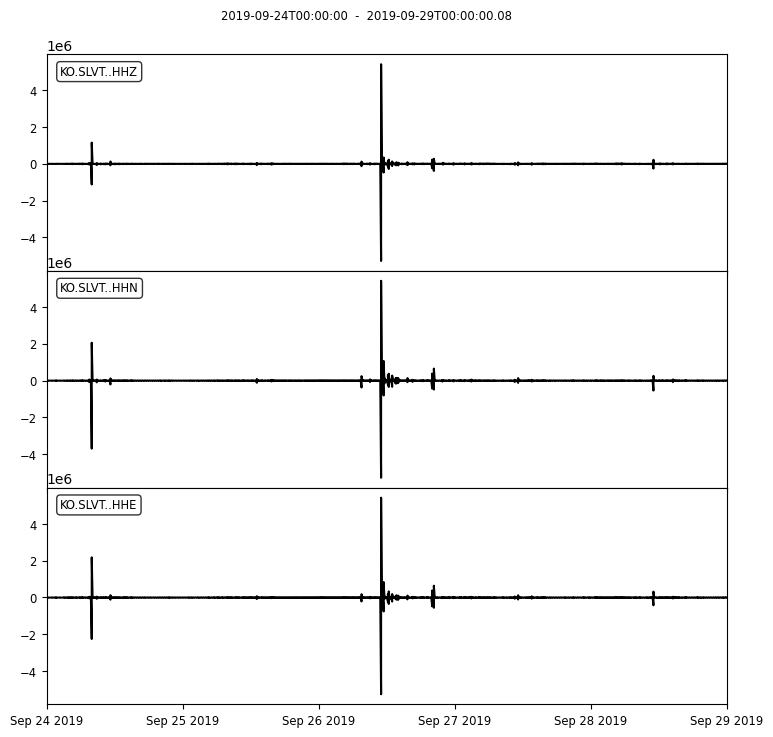

In [20]:
slvt_st.plot();

## 2. Data Preprocessing

Data is preprocessed to be compatible with the model. Preprocessing includes bandpass filtering and normalization just like the RECOVAR Paper. In this step stream is merged, we make sure the data is continuous and split the data to 30 second continuous time windows. The data is saved as a .NPY file for training the model.

In [11]:
from mseed2npy import stream2np, check_stream_for_nans

In [12]:
output_dir = "/home/ege/Documents/STEAD_SUBSAMPLER/SLVR_NPY"

In [13]:
if not check_stream_for_nans(slvt_merged):
    stream2np(slvt_merged, output_dir)
else:
    print("Please handle nan values")

Trace 0: KO.SLVT..HHE has NO NaN values
Trace 1: KO.SLVT..HHN has NO NaN values
Trace 2: KO.SLVT..HHZ has NO NaN values
No NaN values found in any trace of the stream
Checking original stream for NaNs:
Trace 0: KO.SLVT..HHE has NO NaN values
Trace 1: KO.SLVT..HHN has NO NaN values
Trace 2: KO.SLVT..HHZ has NO NaN values
No NaN values found in any trace of the stream
After merging split traces: 3 Trace(s) in Stream:
KO.SLVT..HHE | 2019-09-24T00:00:00.000000Z - 2019-09-29T00:00:00.080000Z | 100.0 Hz, 43200009 samples
KO.SLVT..HHN | 2019-09-24T00:00:00.000000Z - 2019-09-29T00:00:00.080000Z | 100.0 Hz, 43200009 samples
KO.SLVT..HHZ | 2019-09-24T00:00:00.000000Z - 2019-09-29T00:00:00.080000Z | 100.0 Hz, 43200009 samples
Common time range: 2019-09-24T00:00:00.000000Z to 2019-09-29T00:00:00.080000Z
Processing 14400 potential time windows of 30 seconds each
Found 14400 complete windows with no NaN values across all channels
Stream saved at: /home/ege/Documents/STEAD_SUBSAMPLER/SLVR_NPY/KO.SLVT

## 3. Training 

Training has been completed in a seperate training notebook. RECOVAR offers us three different model architectures. For this experiment we used Multiple Autoencoder (RepresentationLearningMultipleAutoencoder).

Other training parameters and details are given below for each trained model.

**SLVT MULTIAUTOENCODER MODEL PARAMETERS AND DETAILS**

In [16]:
EPOCHS = 5
LEARNING_RATE = 1e-3

In [17]:
"Training data shape: (14400, 3000, 3)"

'Training data shape: (14400, 3000, 3)'

Training output

In [19]:
"""
Epoch 1/5
57/57 [==============================] - ETA: 0s - loss: 2.3096
Epoch 1: saving model to checkpoints/autoencoder_epoch_01.h5
WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
57/57 [==============================] - 700s 9s/step - loss: 2.3096
Epoch 2/5
57/57 [==============================] - ETA: 0s - loss: 1.7966
Epoch 2: saving model to checkpoints/autoencoder_epoch_02.h5
WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
57/57 [==============================] - 507s 9s/step - loss: 1.7966
Epoch 3/5
57/57 [==============================] - ETA: 0s - loss: 1.5062
Epoch 3: saving model to checkpoints/autoencoder_epoch_03.h5
WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
57/57 [==============================] - 492s 9s/step - loss: 1.5062
Epoch 4/5
57/57 [==============================] - ETA: 0s - loss: 1.3458
Epoch 4: saving model to checkpoints/autoencoder_epoch_04.h5
WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
57/57 [==============================] - 486s 9s/step - loss: 1.3458
Epoch 5/5
57/57 [==============================] - ETA: 0s - loss: 1.2501
Epoch 5: saving model to checkpoints/autoencoder_epoch_05.h5
WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
57/57 [==============================] - 494s 9s/step - loss: 1.2501
Model saved to checkpoints/SLVT_FULL_representation_cross_covariances_5epochs.h5
"""

'\nEpoch 1/5\n57/57 [==============================] - ETA: 0s - loss: 2.3096\nEpoch 1: saving model to checkpoints/autoencoder_epoch_01.h5\nWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss\n57/57 [==============================] - 700s 9s/step - loss: 2.3096\nEpoch 2/5\n57/57 [==============================] - ETA: 0s - loss: 1.7966\nEpoch 2: saving model to checkpoints/autoencoder_epoch_02.h5\nWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss\n57/57 [==============================] - 507s 9s/step - loss: 1.7966\nEpoch 3/5\n57/57 [==============================] - ETA: 0s - loss: 1.5062\nEpoch 3: saving model to checkpoints/autoencoder_epoch_03.h5\nWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss\n57/57 [==============================] - 492s 9s/step - loss: 1.5062\nEpoch 4/5\n57

## 4. Testing and ROC/AUC curves

We subsampled the STEAD dataset for testing. Subsamples with different noise:event ratios and number of samples was used.

**10.000 samples with %90 noise, %10 percent event**

In [ ]:
auc_score = 0.6808351111111111

**10.000 samples with %30 noise, %70 percent event**

In [23]:
auc_score="0.6812136904761905"

**1000 samples with %90 noise, %10 percent event**

In [25]:
auc_score=0.7075555555555556

**1000 samples with %30 noise, %70 percent event**

In [24]:
auc_score=0.6976571428571428